# Lysozyme Aggregation Assay

In [2]:
data = read.csv("data/LysAggregation_A7-A12_MasineAli.csv")

In [3]:
colnames(data)

[1] "Cycle.Nr."  "Time..s."   "Temp....C." "A7"         "A8"        
[6] "A9"         "A10"        "A11"        "A12"

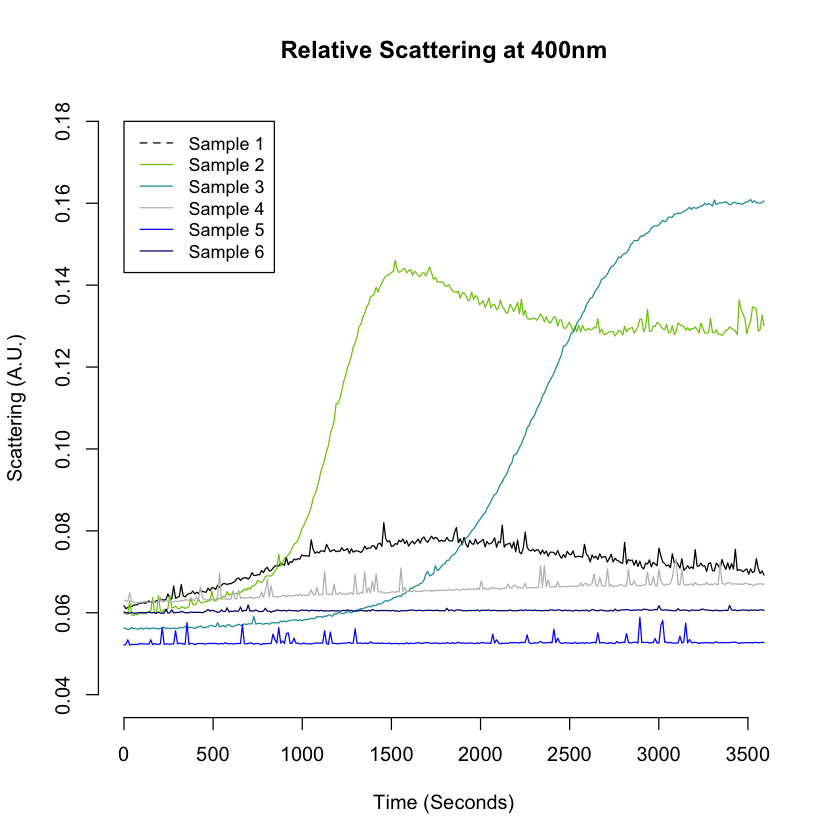

In [4]:
plot(x = data$Time..s., y = data$A7, col="black",
     type = "l", 
     ylim = c(0.04,0.18),
     xlab="Time (Seconds)", ylab="Scattering (A.U.)",
     main="Relative Scattering at 400nm", frame=FALSE)
lines(x = data$Time..s., y = data$A8, col="#7fc809")
lines(x = data$Time..s., y = data$A9, col="#169ba8")
lines(x = data$Time..s., y = data$A10, col="gray")
lines(x = data$Time..s., y = data$A11, col="blue")
lines(x = data$Time..s., y = data$A12, col="navy")

legend(0, 0.18, lty=c(2,1,1,1,1,1), cex=0.9, 
       legend=c(
           "Sample 1",
           "Sample 2",
           "Sample 3",
           "Sample 4",
           "Sample 5",
           "Sample 6"
        ), 
       col=c(
        "black",
        "#7fc809",
        "#169ba8",
        "gray",
        "blue",
        "navy"
       ))

In [5]:
library("DescTools")

t_A8 = data$Time..s.[Closest(data$A8 - data$A7, max(data$A8 - data$A7)/2, which=TRUE)]
t_A9 = data$Time..s.[Closest(data$A9 - data$A7, max(data$A9 - data$A7)/2, which=TRUE)]

pdf 
  2

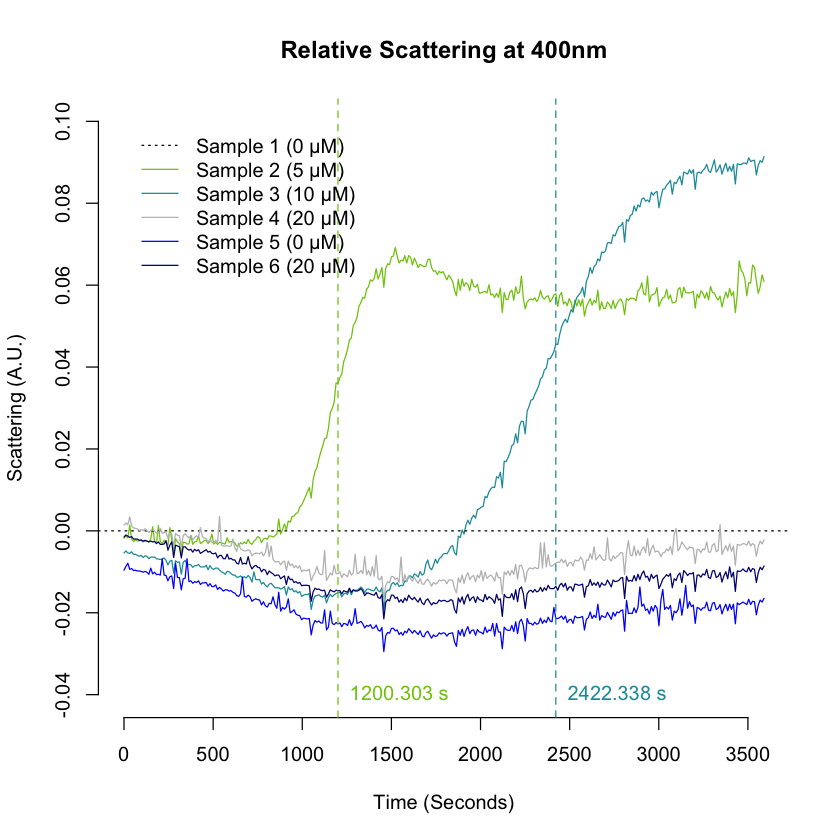

In [37]:
plot(x = data$Time..s., y = data$A8 - data$A7, col="#7fc809",
     type = "l", 
     ylim = c(-0.04,0.1),
     xlab="Time (Seconds)", ylab="Scattering (A.U.)",
     main="Relative Scattering at 400nm", frame=FALSE)
lines(x = data$Time..s., y = data$A9 - data$A7, col="#169ba8")
abline(h=0, lty=3)
# ---
lines(x = data$Time..s., y = data$A10 - data$A7, col="gray")
lines(x = data$Time..s., y = data$A11 - data$A7, col="blue")
lines(x = data$Time..s., y = data$A12 - data$A7, col="navy")

abline(v=t_A8, lty=2, col="#7fc809")
abline(v=t_A9, lty=2, col="#169ba8")

text(x=t_A8, y=-0.04, labels=paste(t_A8, "s"), cex=1, col="#7fc809", pos=4) 
text(x=t_A9, y=-0.04, labels=paste(t_A9, "s"), cex=1, col="#169ba8", pos=4) 

legend(0, 0.1, lty=c(3,1,1,1,1,1), cex=1,  bty="n",
       legend=c(
           "Sample 1 (0 µM)",
           "Sample 2 (5 µM)",
           "Sample 3 (10 µM)",
           "Sample 4 (20 µM)",
           "Sample 5 (0 µM)",
           "Sample 6 (20 µM)"
        ), 
       col=c(
        "black",
        "#7fc809",
        "#169ba8",
        "gray",
        "blue",
        "navy"
       ))
dev.print(png, 'resources/aggregation_main.png', width=900, height=900)

Poor absorbance spectrometer used to do a poor-man's version of scattering. The scattering is not actually detected.
What we do is choose a wavelength where we know nothing in the mix absorbs anything and we use that fact to say all of the intensity reduction is 
because of the scattered light.